# Project 2: Karamoja Region of Uganda

# Introduction

Karamoja is the most food-insecure region of Uganda. One of the main reasons is the low productivity level of the crops due to intense droughts as well as pest and disease outbreaks.
In Karamoja, several NGOs provide technical support as well as farm inputs to the farmers experiencing extremely low yield.  Dalberg Data Insights (DDI) has been tasked with developing a new food security monitoring tool to support the decision making of one of those NGOs active in Karamoja.
The dataset used in this project was provided by DDI who developed a methodology to remotely measure the yield of the two main staple crops of the region (i.e. sorghum and maize) based on satellite images for the 2017 crop season.

The specific requirements for this initial prototype are:

**Interactive Map:** The dashboard must incorporate an interactive map to visually represent the spatial distribution of predicted crop yields across the region.

**District/Sub-county Level Analysis:** The tool should enable the visualization of yield data at both the district and sub-county administrative levels, providing a granular understanding of crop performance within Karamoja.


## Aim
To Establish the most food insecure Districts.

## Objectives

 1. To determine the yield per capita for the two main staple crops of the region.
 2. To determine the Population density.
 3. To compare Sorghum and Maize production across the subcounties and counties.
 4. To access the vulnerability to food insecurity shocks.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
karamoja_district_data = pd.read_csv('Uganda_Karamoja_District_Crop_Yield_Population.csv')
karamoja_district_data

,OBJECTID,NAME,POP,Area,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
0,92,ABIM,90385,2771977106,449,1040,5470.068394,3277.295971,1848.621855,1471506,1922567
1,96,AMUDAT,101790,1643582836,205,1297,5765.443719,2973.423860,2733.661014,609552,3545558
2,20,KAABONG,627057,7373606003,279,945,28121.672530,20544.194960,7394.416334,5731830,6987723
3,85,KOTIDO,243157,3641539808,331,1148,53032.649450,50247.443900,1751.372284,16631904,2010575
4,5,MOROTO,127811,3570160948,128,355,5954.814048,4741.748776,1190.050606,606944,422468
5,54,NAKAPIRIPIRIT,146780,4216323900,356,1264,26372.698490,19237.333210,6425.788414,6848491,8122197
6,80,NAPAK,167625,4508782023,137,854,22944.296020,16142.015880,6543.719066,2211456,5588336


In [3]:
karamoja_subcounty_data = pd.read_csv('Uganda_Karamoja_Subcounty_Crop_Yield_Population.csv')
karamoja_subcounty_data

,OBJECTID,SUBCOUNTY_NAME,DISTRICT_NAME,POP,Area,Karamoja,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
0,263,KACHERI,KOTIDO,17244,1067176155,Y,354.207411,1137.467019,7023.533691,6434.342449,528.124229,2.279092e+06,6.007239e+05
1,264,KOTIDO,KOTIDO,52771,597575188,Y,367.890523,1162.996687,13587.990760,12455.592640,824.767081,4.582294e+06,9.592014e+05
2,265,KOTIDO TOWN COUNCIL,KOTIDO,27389,23972401,Y,369.314177,1167.005832,1656.531855,1520.322052,8.561644,5.614765e+05,9.991488e+03
3,266,NAKAPERIMORU,KOTIDO,38775,419111591,Y,283.324569,852.366578,7087.823334,6761.488901,45.721712,1.915696e+06,3.897166e+04
4,267,PANYANGARA,KOTIDO,65704,880955930,Y,373.836926,1283.859882,10398.249390,10111.198130,172.611914,3.779939e+06,2.216095e+05
5,268,RENGEN,KOTIDO,41273,652744859,Y,271.185843,1047.180128,13278.520430,12964.499730,171.585704,3.515789e+06,1.796811e+05
6,591,KAABONG EAST,KAABONG,42221,60801942,Y,160.588525,650.123565,1021.316990,1004.647534,15.660409,1.613349e+05,1.018120e+04
7,592,KAABONG TOWN COUNCIL,KAABONG,38857,13071455,Y,212.210703,1229.213444,175.080527,156.503888,18.526186,3.321180e+04,2.277264e+04
8,593,KAABONG WEST,KAABONG,41454,67612362,Y,208.040518,1056.416068,967.336727,910.254122,56.275355,1.893697e+05,5.945019e+04
9,594,KALAPATA,KAABONG,99203,223116860,Y,209.809352,633.423182,2834.349905,2501.368282,331.225795,5.248105e+05,2.098061e+05


#  Karamoja Sub-Counties


In [4]:
karamoja_subcounty_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   OBJECTID        52 non-null     int64  
 1   SUBCOUNTY_NAME  52 non-null     object 
 2   DISTRICT_NAME   52 non-null     object 
 3   POP             52 non-null     int64  
 4   Area            52 non-null     int64  
 5   Karamoja        52 non-null     object 
 6   S_Yield_Ha      52 non-null     float64
 7   M_Yield_Ha      52 non-null     float64
 8   Crop_Area_Ha    52 non-null     float64
 9   S_Area_Ha       52 non-null     float64
 10  M_Area_Ha       52 non-null     float64
 11  S_Prod_Tot      52 non-null     float64
 12  M_Prod_Tot      52 non-null     float64
dtypes: float64(7), int64(3), object(3)
memory usage: 5.4+ KB


In [5]:
karamoja_subcounty_data.shape

(52, 13)

In [6]:
karamoja_subcounty_data.describe()

,OBJECTID,POP,Area,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
count,52.000000,52.000000,5.200000e+01,52.000000,52.000000,52.000000,52.000000,52.000000,5.200000e+01,5.200000e+01
mean,787.865385,28934.692308,5.331913e+08,274.165405,940.259552,2839.646974,2253.143395,536.300569,6.557443e+05,5.500730e+05
std,280.101314,20865.122974,4.913308e+08,118.569907,321.641901,3110.505917,2954.355858,724.092288,9.915839e+05,7.939707e+05
min,263.000000,1418.000000,2.121209e+06,108.156411,0.000000,0.171390,0.130941,0.000000,1.728126e+01,0.000000e+00
25%,597.750000,16558.500000,1.568923e+08,173.034066,743.075879,964.876031,405.394759,79.821743,1.210555e+05,6.087012e+04
50%,810.500000,23053.500000,3.848356e+08,277.255206,1016.684002,1654.265138,1231.824455,326.479336,2.543687e+05,2.896239e+05
75%,982.250000,39461.000000,7.749029e+08,368.246437,1203.548665,3267.564651,2429.985069,740.296675,6.040942e+05,8.114574e+05
max,1320.000000,100919.000000,2.069555e+09,560.313070,1396.991494,13587.990760,12964.499730,3840.698081,4.582294e+06,4.365058e+06


In [7]:
#Check for missing values in the data set

#SubCounty
missing = karamoja_subcounty_data
missing = karamoja_subcounty_data.isnull().sum()
print(missing)

OBJECTID          0
SUBCOUNTY_NAME    0
DISTRICT_NAME     0
POP               0
Area              0
Karamoja          0
S_Yield_Ha        0
M_Yield_Ha        0
Crop_Area_Ha      0
S_Area_Ha         0
M_Area_Ha         0
S_Prod_Tot        0
M_Prod_Tot        0
dtype: int64


In [8]:
#District
missing = karamoja_district_data
missing = karamoja_district_data.isnull().sum()
print(missing)

OBJECTID        0
NAME            0
POP             0
Area            0
S_Yield_Ha      0
M_Yield_Ha      0
Crop_Area_Ha    0
S_Area_Ha       0
M_Area_Ha       0
S_Prod_Tot      0
M_Prod_Tot      0
dtype: int64


In [9]:
karamoja_subcounty_data.columns

Index(['OBJECTID', 'SUBCOUNTY_NAME', 'DISTRICT_NAME', 'POP', 'Area',
       'Karamoja', 'S_Yield_Ha', 'M_Yield_Ha', 'Crop_Area_Ha', 'S_Area_Ha',
       'M_Area_Ha', 'S_Prod_Tot', 'M_Prod_Tot'],
      dtype='object')

In [10]:
#Create a dataframe with the columns of interest
cleaned_subcounty_data = karamoja_subcounty_data.drop(['Karamoja'], axis=1)
print(cleaned_subcounty_data)

    OBJECTID              SUBCOUNTY_NAME  DISTRICT_NAME     POP        Area  \
0        263                     KACHERI         KOTIDO   17244  1067176155   
1        264                      KOTIDO         KOTIDO   52771   597575188   
2        265         KOTIDO TOWN COUNCIL         KOTIDO   27389    23972401   
3        266                NAKAPERIMORU         KOTIDO   38775   419111591   
4        267                  PANYANGARA         KOTIDO   65704   880955930   
5        268                      RENGEN         KOTIDO   41273   652744859   
6        591               KAABONG  EAST        KAABONG   42221    60801942   
7        592        KAABONG TOWN COUNCIL        KAABONG   38857    13071455   
8        593                KAABONG WEST        KAABONG   41454    67612362   
9        594                    KALAPATA        KAABONG   99203   223116860   
10       595                      KAMION        KAABONG   60070  1199409465   
11       596                      KAPEDO        KAAB

In [11]:
cleaned_subcounty_data.shape

(52, 12)

In [12]:
cleaned_subcounty_data.rename(columns={'OBJECTID': 'ObjectID', 'SUBCOUNTY_NAME': 'SubCounty_Name', 'DISTRICT_NAME': 'District_Name', 'POP': 'Population' }, inplace=True)

In [13]:
cleaned_subcounty_data.describe()

,ObjectID,Population,Area,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
count,52.000000,52.000000,5.200000e+01,52.000000,52.000000,52.000000,52.000000,52.000000,5.200000e+01,5.200000e+01
mean,787.865385,28934.692308,5.331913e+08,274.165405,940.259552,2839.646974,2253.143395,536.300569,6.557443e+05,5.500730e+05
std,280.101314,20865.122974,4.913308e+08,118.569907,321.641901,3110.505917,2954.355858,724.092288,9.915839e+05,7.939707e+05
min,263.000000,1418.000000,2.121209e+06,108.156411,0.000000,0.171390,0.130941,0.000000,1.728126e+01,0.000000e+00
25%,597.750000,16558.500000,1.568923e+08,173.034066,743.075879,964.876031,405.394759,79.821743,1.210555e+05,6.087012e+04
50%,810.500000,23053.500000,3.848356e+08,277.255206,1016.684002,1654.265138,1231.824455,326.479336,2.543687e+05,2.896239e+05
75%,982.250000,39461.000000,7.749029e+08,368.246437,1203.548665,3267.564651,2429.985069,740.296675,6.040942e+05,8.114574e+05
max,1320.000000,100919.000000,2.069555e+09,560.313070,1396.991494,13587.990760,12964.499730,3840.698081,4.582294e+06,4.365058e+06


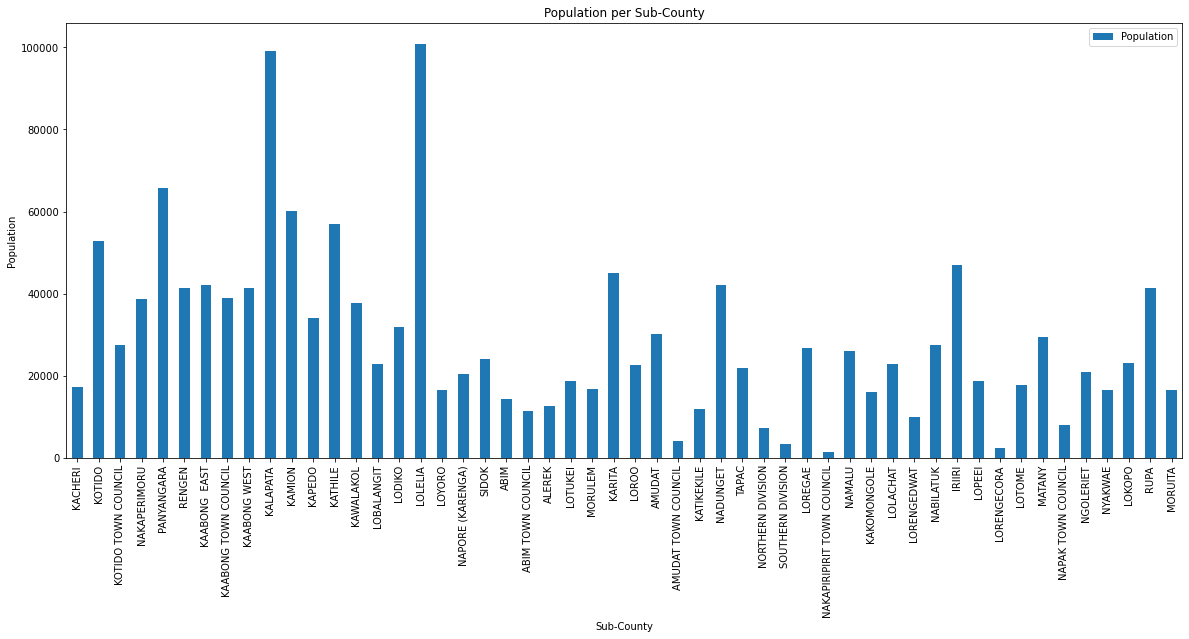

In [55]:
#Population plot 
cleaned_subcounty_data.plot.bar(x = 'SubCounty_Name', y = 'Population', figsize = (20,8))
plt.xlabel('Sub-County')
plt.ylabel('Population')
plt.title('Population per Sub-County');


In [59]:
df = pd.DataFrame(cleaned_subcounty_data)
df.groupby(['District_Name'])['Population'].max()

District_Name
ABIM              18641
AMUDAT            45015
KAABONG          100919
KOTIDO            65704
MOROTO            42115
NAKAPIRIPIRIT     27534
NAPAK             46979
Name: Population, dtype: int64

The most populous sub-county is Lolelia with a population on 100919 in Kaabong District.
The second populuous sub-county is Kalapata which is also in Kaabong District. 

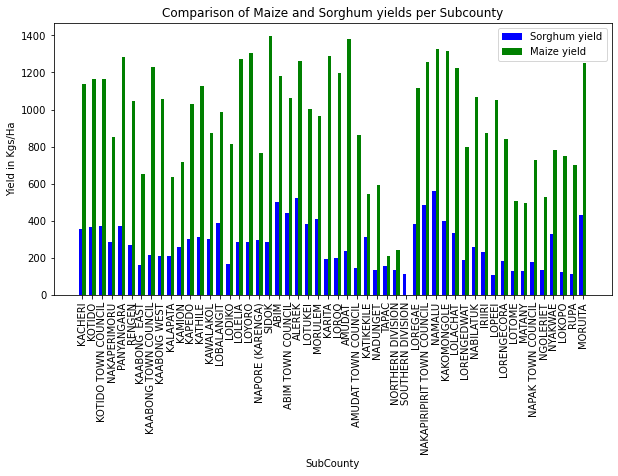

In [15]:
df = pd.DataFrame(cleaned_subcounty_data)

# Set the width of the bars
bar_width = 0.35

# Set positions of the bars on the x-axis
r1 = range(len(df))
r2 = [x + bar_width for x in r1]
#r3 = [x + bar_width for x in r2]

# Create the bar plot
plt.figure(figsize=(10, 5))  # Adjust figure size as needed
plt.bar(r1, df['S_Yield_Ha'], color='blue', width=bar_width, label='Sorghum yield')
plt.bar(r2, df['M_Yield_Ha'], color='green', width=bar_width, label='Maize yield')
#plt.bar(r3,df['Population'], color = 'red', width=bar_width, label='Population')

# Set x-axis labels
plt.xlabel('SubCounty')

# Set y-axis label
plt.ylabel('Yield in Kgs/Ha')

# Set x-axis ticks and labels
plt.xticks([r + bar_width/2 for r in range(len(df))], df['SubCounty_Name'])
plt.xticks(rotation=90)


# Add legend
plt.legend()

# Add title
plt.title('Comparison of Maize and Sorghum yields per Subcounty')

# Show the plot
plt.show()

From the bar chart above it is evident that all subcounties harvest more maize than sorghum except for Southern Division in Moroto District which does not grow any maize.


In [16]:
#Here we include calculation of yield per capita for both Sorghum and Maize
#Per capita yield = Total production / Population 
import pandas as pd
import numpy as np

# Extracting the Total Sorghum Production column as a NumPy array 
column_name = 'S_Prod_Tot'  
column_data = df[column_name].values 

# Creating a NumPy array from the column 
S_Prod_Tot_array = np.array(column_data) 

#Repeating the same steps above foe the Population column. 
column_name2 = 'Population'  # 
column_data2 = df[column_name2].values 
Population_array = np.array(column_data2) 

#Creating a NumPy array for the Sorghum per capita yield
S_per_capita_yield = (S_Prod_Tot_array/ Population_array)

#Adding the Sorghum per capita to dataframe 
df['S_per_capita_yield'] = S_per_capita_yield.tolist()


#For Maize:

column_name = 'M_Prod_Tot'  
column_data = df[column_name].values 

#Create a NumPy array from the column 
M_Prod_Tot_array = np.array(column_data) 
# Create a NumPy array for the Sorghum per capita yield
M_per_capita_yield = (M_Prod_Tot_array/ Population_array)

#Adding the Sorghum per capita to dataframe 
df['M_per_capita_yield'] = M_per_capita_yield.tolist()

#Population Density

#To calculate population density, you divide the total population of a given area by the total land area available

# Extracting the Area column as a NumPy array 
column_name = 'Area'  
column_data = df[column_name].values 

#Create a NumPy array from the column 
Area_array = np.array(column_data) 
# Create a NumPy array for the Sorghum per capita yield
Population_Density = (Population_array/Area_array)

#Adding the Sorghum per capita to dataframe 
df['Population_Density'] = Population_Density.tolist()
df


,ObjectID,SubCounty_Name,District_Name,Population,Area,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot,S_per_capita_yield,M_per_capita_yield,Population_Density
0,263,KACHERI,KOTIDO,17244,1067176155,354.207411,1137.467019,7023.533691,6434.342449,528.124229,2.279092e+06,6.007239e+05,132.167234,34.836691,0.000016
1,264,KOTIDO,KOTIDO,52771,597575188,367.890523,1162.996687,13587.990760,12455.592640,824.767081,4.582294e+06,9.592014e+05,86.833573,18.176676,0.000088
2,265,KOTIDO TOWN COUNCIL,KOTIDO,27389,23972401,369.314177,1167.005832,1656.531855,1520.322052,8.561644,5.614765e+05,9.991488e+03,20.500073,0.364799,0.001143
3,266,NAKAPERIMORU,KOTIDO,38775,419111591,283.324569,852.366578,7087.823334,6761.488901,45.721712,1.915696e+06,3.897166e+04,49.405440,1.005072,0.000093
4,267,PANYANGARA,KOTIDO,65704,880955930,373.836926,1283.859882,10398.249390,10111.198130,172.611914,3.779939e+06,2.216095e+05,57.529819,3.372847,0.000075
5,268,RENGEN,KOTIDO,41273,652744859,271.185843,1047.180128,13278.520430,12964.499730,171.585704,3.515789e+06,1.796811e+05,85.183747,4.353479,0.000063
6,591,KAABONG EAST,KAABONG,42221,60801942,160.588525,650.123565,1021.316990,1004.647534,15.660409,1.613349e+05,1.018120e+04,3.821200,0.241141,0.000694
7,592,KAABONG TOWN COUNCIL,KAABONG,38857,13071455,212.210703,1229.213444,175.080527,156.503888,18.526186,3.321180e+04,2.277264e+04,0.854719,0.586063,0.002973
8,593,KAABONG WEST,KAABONG,41454,67612362,208.040518,1056.416068,967.336727,910.254122,56.275355,1.893697e+05,5.945019e+04,4.568190,1.434124,0.000613
9,594,KALAPATA,KAABONG,99203,223116860,209.809352,633.423182,2834.349905,2501.368282,331.225795,5.248105e+05,2.098061e+05,5.290268,2.114917,0.000445


In [17]:
## Population Density
#To calculate population density, you divide the total population of a given area by the total land area available

# Extracting the Area column as a NumPy array 
column_name = 'Area'  
column_data = df[column_name].values 

#Create a NumPy array from the column 
Area_array = np.array(column_data) 

# Create a NumPy array for the Sorghum per capita yield
Population_Density = (Population_array/Area_array)

#Adding the Sorghum per capita to dataframe 
df['Population_Density'] = Population_Density.tolist()
df

,ObjectID,SubCounty_Name,District_Name,Population,Area,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot,S_per_capita_yield,M_per_capita_yield,Population_Density
0,263,KACHERI,KOTIDO,17244,1067176155,354.207411,1137.467019,7023.533691,6434.342449,528.124229,2.279092e+06,6.007239e+05,132.167234,34.836691,0.000016
1,264,KOTIDO,KOTIDO,52771,597575188,367.890523,1162.996687,13587.990760,12455.592640,824.767081,4.582294e+06,9.592014e+05,86.833573,18.176676,0.000088
2,265,KOTIDO TOWN COUNCIL,KOTIDO,27389,23972401,369.314177,1167.005832,1656.531855,1520.322052,8.561644,5.614765e+05,9.991488e+03,20.500073,0.364799,0.001143
3,266,NAKAPERIMORU,KOTIDO,38775,419111591,283.324569,852.366578,7087.823334,6761.488901,45.721712,1.915696e+06,3.897166e+04,49.405440,1.005072,0.000093
4,267,PANYANGARA,KOTIDO,65704,880955930,373.836926,1283.859882,10398.249390,10111.198130,172.611914,3.779939e+06,2.216095e+05,57.529819,3.372847,0.000075
5,268,RENGEN,KOTIDO,41273,652744859,271.185843,1047.180128,13278.520430,12964.499730,171.585704,3.515789e+06,1.796811e+05,85.183747,4.353479,0.000063
6,591,KAABONG EAST,KAABONG,42221,60801942,160.588525,650.123565,1021.316990,1004.647534,15.660409,1.613349e+05,1.018120e+04,3.821200,0.241141,0.000694
7,592,KAABONG TOWN COUNCIL,KAABONG,38857,13071455,212.210703,1229.213444,175.080527,156.503888,18.526186,3.321180e+04,2.277264e+04,0.854719,0.586063,0.002973
8,593,KAABONG WEST,KAABONG,41454,67612362,208.040518,1056.416068,967.336727,910.254122,56.275355,1.893697e+05,5.945019e+04,4.568190,1.434124,0.000613
9,594,KALAPATA,KAABONG,99203,223116860,209.809352,633.423182,2834.349905,2501.368282,331.225795,5.248105e+05,2.098061e+05,5.290268,2.114917,0.000445


In [62]:
 df.describe()

,ObjectID,Population,Area,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot,S_per_capita_yield,M_per_capita_yield,Population_Density
count,52.000000,52.000000,5.200000e+01,52.000000,52.000000,52.000000,52.000000,52.000000,5.200000e+01,5.200000e+01,52.000000,52.000000,52.000000
mean,787.865385,28934.692308,5.331913e+08,274.165405,940.259552,2839.646974,2253.143395,536.300569,6.557443e+05,5.500730e+05,22.571418,23.484846,0.000257
std,280.101314,20865.122974,4.913308e+08,118.569907,321.641901,3110.505917,2954.355858,724.092288,9.915839e+05,7.939707e+05,27.687722,31.088043,0.000584
min,263.000000,1418.000000,2.121209e+06,108.156411,0.000000,0.171390,0.130941,0.000000,1.728126e+01,0.000000e+00,0.002413,0.000000,0.000010
25%,597.750000,16558.500000,1.568923e+08,173.034066,743.075879,964.876031,405.394759,79.821743,1.210555e+05,6.087012e+04,5.170003,3.085245,0.000035
50%,810.500000,23053.500000,3.848356e+08,277.255206,1016.684002,1654.265138,1231.824455,326.479336,2.543687e+05,2.896239e+05,10.963602,16.388947,0.000068
75%,982.250000,39461.000000,7.749029e+08,368.246437,1203.548665,3267.564651,2429.985069,740.296675,6.040942e+05,8.114574e+05,31.013862,35.295433,0.000116
max,1320.000000,100919.000000,2.069555e+09,560.313070,1396.991494,13587.990760,12964.499730,3840.698081,4.582294e+06,4.365058e+06,132.167234,168.502510,0.002973


## Yield per Capita

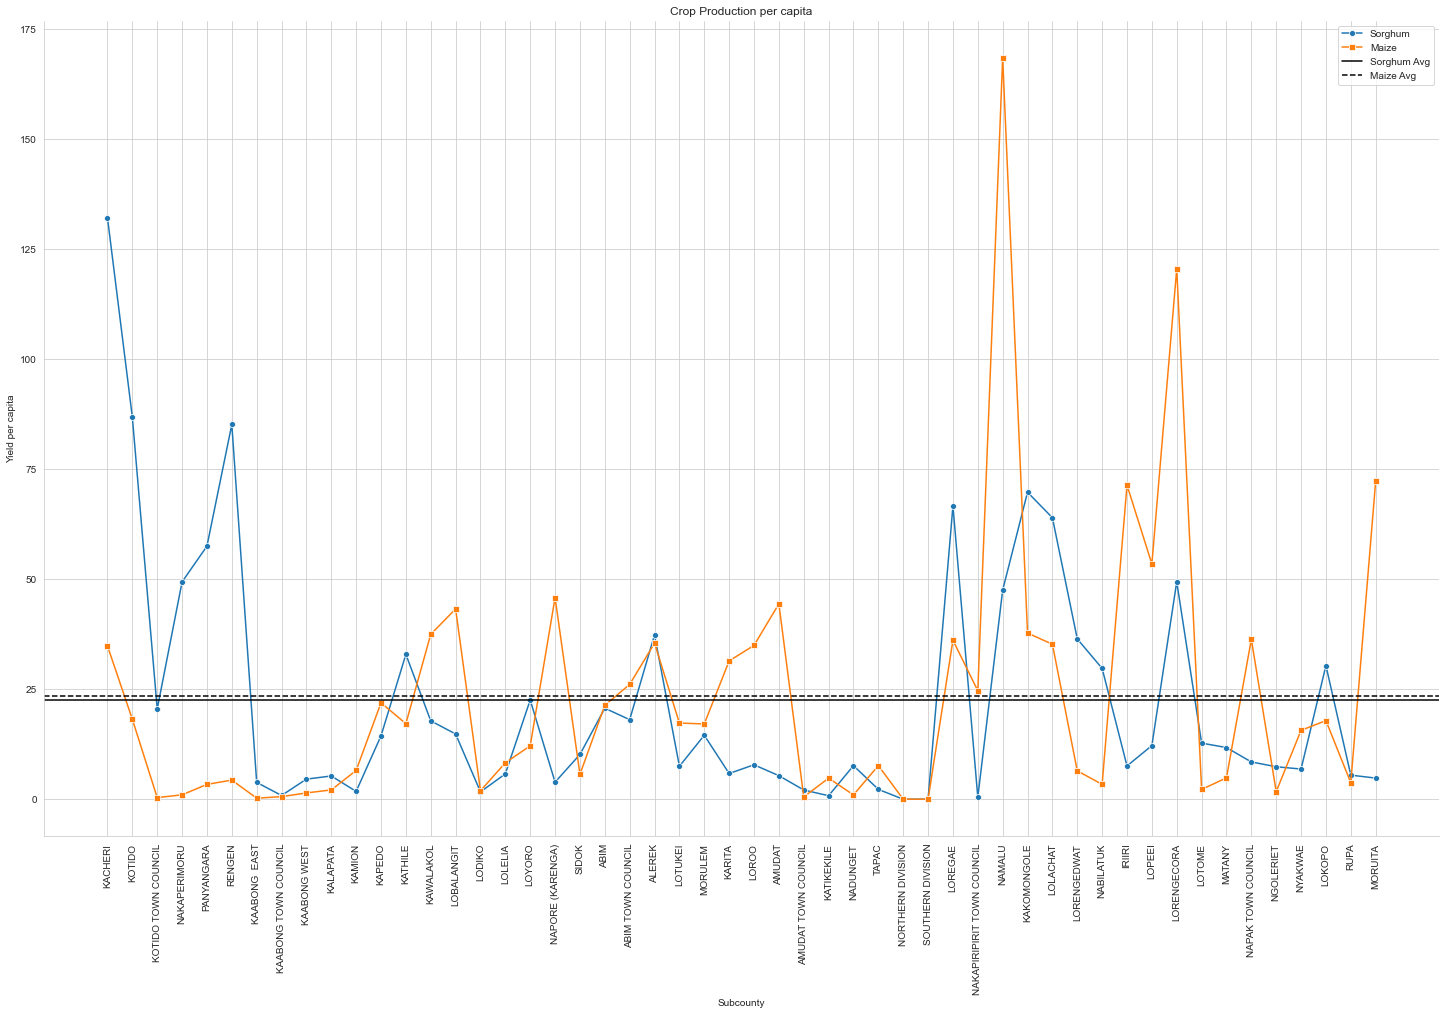

In [64]:
# Create the figure and axes
fig, ax = plt.subplots(figsize=(25, 15))

# Plot the lines using seaborn
sns.lineplot(x='SubCounty_Name', y='S_per_capita_yield', data=df, label='Sorghum', ax=ax, marker='o') 
sns.lineplot(x='SubCounty_Name', y='M_per_capita_yield', data=df, label='Maize', ax=ax, marker='s')
plt.axhline(y=22.57, color='black', linestyle='-', label='Sorghum Avg')
plt.axhline(y=23.48, color='black', linestyle='--', label='Maize Avg')

# Set title and labels
ax.set_title('Crop Production per capita')
ax.set_xlabel('Subcounty')
ax.set_ylabel('Yield per capita')


plt.xticks(rotation=90)

sns.set_style("whitegrid")
sns.despine()  

# Show the plot
plt.legend()
plt.show()

Examining the yield per capita for both crops in all the sub-counties, most sub conties fall below average for Sorghum yield per capita however more than a third of the subcounties are above the average maize yield per capita. 

In [26]:
df.columns

Index(['OBJECTID', 'SUBCOUNTY_NAME', 'DISTRICT_NAME', 'POP', 'Area',
       'Karamoja', 'S_Yield_Ha', 'M_Yield_Ha', 'Crop_Area_Ha', 'S_Area_Ha',
       'M_Area_Ha', 'S_Prod_Tot', 'M_Prod_Tot'],
      dtype='object')

In [21]:
df.corr()

,ObjectID,Population,Area,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot,S_per_capita_yield,M_per_capita_yield,Population_Density
ObjectID,1.000000,-0.413025,0.153613,-0.224381,-0.284216,-0.407773,-0.455794,0.135549,-0.528434,0.117310,-0.355517,0.264606,-0.120450
Population,-0.413025,1.000000,0.257082,-0.081385,0.135996,0.392587,0.371068,0.157311,0.342992,0.144350,0.004672,-0.203486,-0.038614
Area,0.153613,0.257082,1.000000,0.005760,0.131586,0.328405,0.265610,0.307355,0.196369,0.262690,0.213000,0.107345,-0.383251
S_Yield_Ha,-0.224381,-0.081385,0.005760,1.000000,0.624494,0.171402,0.110636,0.238892,0.288920,0.335797,0.356773,0.381092,-0.222273
M_Yield_Ha,-0.284216,0.135996,0.131586,0.624494,1.000000,0.263790,0.221676,0.200557,0.316694,0.334450,0.355269,0.324335,-0.232919
Crop_Area_Ha,-0.407773,0.392587,0.328405,0.171402,0.263790,1.000000,0.970304,0.261783,0.945518,0.282030,0.752291,0.091128,-0.251961
S_Area_Ha,-0.455794,0.371068,0.265610,0.110636,0.221676,0.970304,1.000000,0.021327,0.958651,0.049947,0.759541,-0.087829,-0.200470
M_Area_Ha,0.135549,0.157311,0.307355,0.238892,0.200557,0.261783,0.021327,1.000000,0.076654,0.962444,0.071236,0.718710,-0.247031
S_Prod_Tot,-0.528434,0.342992,0.196369,0.288920,0.316694,0.945518,0.958651,0.076654,1.000000,0.127794,0.803902,-0.001470,-0.176102
M_Prod_Tot,0.117310,0.144350,0.262690,0.335797,0.334450,0.282030,0.049947,0.962444,0.127794,1.000000,0.136345,0.786551,-0.231337



## Vulnerable Sub-Counties

To find the Sub - Counties most vulnerable to shocks, the dataframe was filtered. 
These Sub-Counties should inform stategies to mitigate future risks in terms of food security

The conditions for the filter were:
 1. The Sorghum yield had to be below the Region's Mean of 274kg/Ha
 2. To Maize yield had to be below the Region's Mean of 940kg/Ha
 



In [22]:
# Select rows where Yield is below average

df_filtered_multiple = df[(df['S_Yield_Ha'] < 274) & (df['M_Yield_Ha'] < 940 )] 
print(df_filtered_multiple)

    ObjectID       SubCounty_Name  District_Name  Population        Area  \
6        591        KAABONG  EAST        KAABONG       42221    60801942   
9        594             KALAPATA        KAABONG       99203   223116860   
10       595               KAMION        KAABONG       60070  1199409465   
15       600               LODIKO        KAABONG       31820   397700845   
28       813  AMUDAT TOWN COUNCIL         AMUDAT        4053    17207110   
30       926             NADUNGET         MOROTO       42115   596023780   
31       927                TAPAC         MOROTO       21999   622266516   
32       928    NORTHERN DIVISION         MOROTO        7161     2738777   
33       929    SOUTHERN DIVISION         MOROTO        3272     2121209   
39       983          LORENGEDWAT  NAKAPIRIPIRIT        9929   435714604   
41      1023               IRIIRI          NAPAK       46979  1030623258   
43      1025          LORENGECORA          NAPAK        2503   118997955   
44      1026

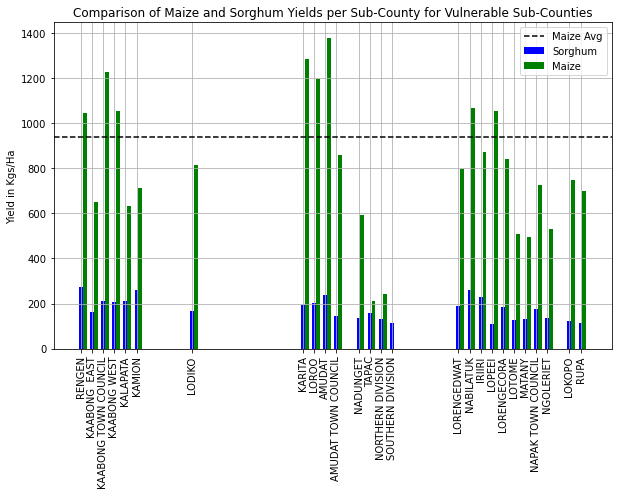

In [49]:
df = pd.DataFrame(cleaned_subcounty_data)

# Filter the DataFrame (example: filter for districts with S_Yield_Ha > 120)
filtered_df = df[df['S_Yield_Ha'] < 274] 

# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the filtered data with different colors
plt.bar(filtered_df.index, filtered_df['S_Yield_Ha'], width=0.35, label='Sorghum', align='edge', color='blue')
plt.bar(filtered_df.index + 0.35, filtered_df['M_Yield_Ha'], width=0.35, label='Maize', align='edge', color='green') 

#Average for maize
plt.axhline(y=940, color='black', linestyle='--', label='Maize Avg')

            # Set x-axis labels
plt.xticks(filtered_df.index + 0.175, filtered_df['SubCounty_Name'], rotation=90) 

# Set y-axis label
plt.ylabel('Yield in Kgs/Ha')

# Add title
plt.title('Comparison of Maize and Sorghum Yields per Sub-County for Vulnerable Sub-Counties')

# Add grid
plt.grid(True)

# Add legend
plt.legend()

# Show the plot
plt.show()



From the above chart the most vulnerable Sub-Counties according to their Districts are:

**KAABONG** 
 1. Kaabong East 
 2. Kalapata 
 3. Kamion 
 4. Lodiko 
 
**NAPAK**
 1. Iriiri 
 2. Lorengecora 
 3. Lotome 
 4. Matany  
 5. Napak Town Council 
 6. Ngoleriet
 7. Lokopo 
 
 
**MOROTO**
 1. Nadunget
 2. Rupa
 3. Tapac
 4. Northern Division 
 5. Southern Division 
 
 
**NAKAPIRIPIRIT**
 1. Lorengedwat
 
**AMUDAT**
 1. Amudat Town Council 
 

With 7 out of 8 subcounties, Napak District is the most vulnerable , followed by Moroto with 5 out of 7. 
This means that 87% of Napak District lies below average yield for both staple crops closely followed by Moroto
at 83%.








# Karamoja District

In [65]:
karamoja_district_data

,OBJECTID,NAME,POP,Area,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
0,92,ABIM,90385,2771977106,449,1040,5470.068394,3277.295971,1848.621855,1471506,1922567
1,96,AMUDAT,101790,1643582836,205,1297,5765.443719,2973.423860,2733.661014,609552,3545558
2,20,KAABONG,627057,7373606003,279,945,28121.672530,20544.194960,7394.416334,5731830,6987723
3,85,KOTIDO,243157,3641539808,331,1148,53032.649450,50247.443900,1751.372284,16631904,2010575
4,5,MOROTO,127811,3570160948,128,355,5954.814048,4741.748776,1190.050606,606944,422468
5,54,NAKAPIRIPIRIT,146780,4216323900,356,1264,26372.698490,19237.333210,6425.788414,6848491,8122197
6,80,NAPAK,167625,4508782023,137,854,22944.296020,16142.015880,6543.719066,2211456,5588336


In [66]:
karamoja_district_data.describe()

,OBJECTID,POP,Area,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
count,7.000000,7.000000,7.000000e+00,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000e+00,7.000000e+00
mean,61.714286,214943.571429,3.960853e+09,269.285714,986.142857,21094.520379,16737.636651,3983.947082,4.873098e+06,4.085632e+06
std,36.481567,188604.280916,1.781860e+09,119.243049,321.566700,17363.854165,16625.963460,2678.911441,5.743724e+06,2.877188e+06
min,5.000000,90385.000000,1.643583e+09,128.000000,355.000000,5470.068394,2973.423860,1190.050606,6.069440e+05,4.224680e+05
25%,37.000000,114800.500000,3.171069e+09,171.000000,899.500000,5860.128883,4009.522373,1799.997070,1.040529e+06,1.966571e+06
50%,80.000000,146780.000000,3.641540e+09,279.000000,1040.000000,22944.296020,16142.015880,2733.661014,2.211456e+06,3.545558e+06
75%,88.500000,205391.000000,4.362553e+09,343.500000,1206.000000,27247.185510,19890.764085,6484.753740,6.290160e+06,6.288030e+06
max,96.000000,627057.000000,7.373606e+09,449.000000,1297.000000,53032.649450,50247.443900,7394.416334,1.663190e+07,8.122197e+06


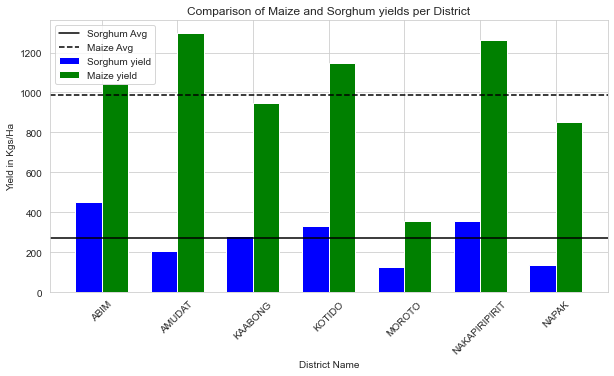

In [69]:
df = pd.DataFrame(karamoja_district_data)

# Set the width of the bars
bar_width = 0.35

# Set positions of the bars on the x-axis
r1 = range(len(df))
r2 = [x + bar_width for x in r1]

# Create the bar plot
plt.figure(figsize=(10, 5))  # Adjust figure size as needed
plt.bar(r1, df['S_Yield_Ha'], color='blue', width=bar_width, label='Sorghum yield')
plt.bar(r2, df['M_Yield_Ha'], color='green', width=bar_width, label='Maize yield')
plt.axhline(y=269, color='black', linestyle='-', label='Sorghum Avg')
plt.axhline(y=986, color='black', linestyle='--', label='Maize Avg')

# Set x-axis labels
plt.xlabel('District Name')

# Set y-axis label
plt.ylabel('Yield in Kgs/Ha')

# Set x-axis ticks and labels
plt.xticks([r + bar_width/2 for r in range(len(df))], df['NAME'])
plt.xticks(rotation=45)

plt.legend()
plt.title('Comparison of Maize and Sorghum yields per District')
plt.show()

As expected Moroto District has the lowest yield for both Maize and sorghum. 
This is in accordance with the findings from the subcounty dataset. 
Napak District, Moroto District, Kaabong District, and Amudat District all have a Sorghum yield below average.
Kaabong District, Moroto District and Napak District have a yield below average for maize.

In [70]:
df.columns

Index(['OBJECTID', 'NAME', 'POP', 'Area', 'S_Yield_Ha', 'M_Yield_Ha',
       'Crop_Area_Ha', 'S_Area_Ha', 'M_Area_Ha', 'S_Prod_Tot', 'M_Prod_Tot'],
      dtype='object')

## Sorghum

### Central Tendancies

#### 1. Average Yield in Kgs/Ha

In [71]:
#Average Yield 
mean_sorghum_yield = df['S_Yield_Ha'].mean()
print(f'The mean yield for Sorghum per Ha is :{mean_sorghum_yield}')

median_sorghum_yield = df['S_Yield_Ha'].median()
print(f'The median yield for Sorghum per Ha is :{median_sorghum_yield}')

std_dev_S_Yield_Ha = df['S_Yield_Ha'].std()
print(f"Standard Deviation for Sorghum per Ha : {std_dev_S_Yield_Ha }")

variance_S_Yield_Ha = df['S_Yield_Ha'].var()
print(f"Variance of Sorghum yield per Ha is : {variance_S_Yield_Ha}")

percentile_25_S_Yield_Ha = df['S_Yield_Ha'].quantile(0.25) 
print(f"25th percentile of Sorghum yield: { percentile_25_S_Yield_Ha}")

percentile_50_S_Yield_Ha = df['S_Yield_Ha'].quantile(0.50) 
print(f"50th percentile (Median) of Sorghum yield: {percentile_50_S_Yield_Ha}")

percentile_75_S_Yield_Ha = df['S_Yield_Ha'].quantile(0.75)
print(f"75th percentile of Sorghum yield: {percentile_75_S_Yield_Ha}")



The mean yield for Sorghum per Ha is :269.2857142857143
The median yield for Sorghum per Ha is :279.0
Standard Deviation for Sorghum per Ha : 119.24304911358463
Variance of Sorghum yield per Ha is : 14218.904761904758
25th percentile of Sorghum yield: 171.0
50th percentile (Median) of Sorghum yield: 279.0
75th percentile of Sorghum yield: 343.5


#### 2. Total Crop Area in Ha

In [72]:
#Total Crop Area  
mean_sorghum_area = df['S_Area_Ha'].mean()
print(f'The mean total crop area in Ha for Sorghum is:{mean_sorghum_area}')    

median_sorghum_area = df['S_Area_Ha'].median()
print(f'The median total crop area in Ha for Sorghum is:{median_sorghum_area}')

std_dev_S_Area_Ha = df['S_Area_Ha'].std()
print(f"Standard Deviation for the total area of Sorghum in Ha : {std_dev_S_Area_Ha }")

variance_S_Area_Ha = df['S_Area_Ha'].var()
print(f"Variance of Total Sorghum Area in Ha is : {variance_S_Area_Ha}")

percentile_25_S_Area_Ha = df['S_Area_Ha'].quantile(0.25) 
print(f"25th percentile of Sorghum Area: { percentile_25_S_Area_Ha}")

percentile_50_S_Area_Ha = df['S_Area_Ha'].quantile(0.50) 
print(f"50th percentile (Median) of Sorghum Area: {percentile_50_S_Area_Ha}")

percentile_75_S_Area_Ha = df['S_Area_Ha'].quantile(0.75)
print(f"75th percentile of Sorghum Area: {percentile_75_S_Area_Ha}")


The mean total crop area in Ha for Sorghum is:16737.636651
The median total crop area in Ha for Sorghum is:16142.01588
Standard Deviation for the total area of Sorghum in Ha : 16625.963460313287
Variance of Total Sorghum Area in Ha is : 276422660.9836726
25th percentile of Sorghum Area: 4009.5223735
50th percentile (Median) of Sorghum Area: 16142.01588
75th percentile of Sorghum Area: 19890.764085000003


#### 3. Total Crop Productivity in Ha

In [73]:
#Total Productivity for Soghum in Kgs
mean_sorghum_productivity = df['S_Prod_Tot'].mean()
print(f'The mean total productivity  in Kgs for Sorghum is:{mean_sorghum_productivity}')
median_sorghum_productivity = df['S_Prod_Tot'].median()
print(f'The median total productivity  in Kgs for Sorghum is:{median_sorghum_productivity}')

std_dev_S_Prod_Tot = df['S_Prod_Tot'].std()
print(f"Standard Deviation for the total productivity of Sorghum in Ha : {std_dev_S_Prod_Tot }")

variance_S_Prod_Tot = df['S_Prod_Tot'].var()
print(f"Variance of Total Sorghum productivity in Kgs is : {variance_S_Prod_Tot}")

percentile_25_S_Prod_Tot = df['S_Prod_Tot'].quantile(0.25) 
print(f"25th percentile of Sorghum productivity: { percentile_25_S_Prod_Tot}")

percentile_50_S_Prod_Tot = df['S_Prod_Tot'].quantile(0.50) 
print(f"50th percentile (Median) of Sorghum productivity: {percentile_50_S_Prod_Tot}")

percentile_75_S_Prod_Tot = df['S_Prod_Tot'].quantile(0.75)
print(f"75th percentile of Sorghum productivity: {percentile_75_S_Prod_Tot}")

The mean total productivity  in Kgs for Sorghum is:4873097.571428572
The median total productivity  in Kgs for Sorghum is:2211456.0
Standard Deviation for the total productivity of Sorghum in Ha : 5743723.783608907
Variance of Total Sorghum productivity in Kgs is : 32990362902394.62
25th percentile of Sorghum productivity: 1040529.0
50th percentile (Median) of Sorghum productivity: 2211456.0
75th percentile of Sorghum productivity: 6290160.5


## Maize

### Central Tendancies

#### 1. Average Yield in Kgs/Ha

In [74]:
#Average Yield 
mean_maize_yield = df['M_Yield_Ha'].mean()
print(f'The mean yield for Maize per Ha is :{mean_maize_yield}')

median_maize_yield = df['M_Yield_Ha'].median()
print(f'The median yield for Maize per Ha is :{median_maize_yield}')

std_dev_M_Yield_Ha = df['M_Yield_Ha'].std()
print(f"Standard Deviation for Maize per Ha : {std_dev_M_Yield_Ha }")

variance_M_Yield_Ha = df['M_Yield_Ha'].var()
print(f"Variance of Maize yield per Ha is : {variance_M_Yield_Ha}")

percentile_25_M_Yield_Ha = df['M_Yield_Ha'].quantile(0.25) 
print(f"25th percentile of Maize yield: { percentile_25_M_Yield_Ha}")

percentile_50_M_Yield_Ha = df['M_Yield_Ha'].quantile(0.50) 
print(f"50th percentile (Median) of Maize yield: {percentile_50_M_Yield_Ha}")

percentile_75_M_Yield_Ha = df['M_Yield_Ha'].quantile(0.75)
print(f"75th percentile of Maize yield: {percentile_75_M_Yield_Ha}")


The mean yield for Maize per Ha is :986.1428571428571
The median yield for Maize per Ha is :1040.0
Standard Deviation for Maize per Ha : 321.56670047929845
Variance of Maize yield per Ha is : 103405.14285714284
25th percentile of Maize yield: 899.5
50th percentile (Median) of Maize yield: 1040.0
75th percentile of Maize yield: 1206.0


#### 2. Total Crop Area  in Ha

In [75]:
#Total Crop Area  
mean_maize_area = df['M_Area_Ha'].mean()
print(f'The mean total crop area in Ha for Maize is:{mean_maize_area}')    

median_maize_area = df['M_Area_Ha'].median()
print(f'The median total crop area in Ha for Maize is:{median_sorghum_area}')

std_dev_M_Area_Ha = df['M_Area_Ha'].std()
print(f"Standard Deviation for the total area of Maize in Ha : {std_dev_M_Area_Ha }")

variance_M_Area_Ha = df['M_Area_Ha'].var()
print(f"Variance of Total Maize Area in Ha is : {variance_M_Area_Ha}")

percentile_25_M_Area_Ha = df['M_Area_Ha'].quantile(0.25) 
print(f"25th percentile of Maize area: { percentile_25_M_Area_Ha}")

percentile_50_M_Area_Ha = df['M_Area_Ha'].quantile(0.50) 
print(f"50th percentile (Median) of Maize area: {percentile_50_M_Area_Ha}")

percentile_75_M_Area_Ha = df['M_Area_Ha'].quantile(0.75)
print(f"75th percentile of Maize area: {percentile_75_M_Area_Ha}")


The mean total crop area in Ha for Maize is:3983.9470818571426
The median total crop area in Ha for Maize is:16142.01588
Standard Deviation for the total area of Maize in Ha : 2678.911440732962
Variance of Total Maize Area in Ha is : 7176566.507289954
25th percentile of Maize area: 1799.9970695000002
50th percentile (Median) of Maize area: 2733.6610140000003
75th percentile of Maize area: 6484.75374


#### 3. Total Crop Productivity in Kgs

In [76]:
#Total Productivity for Maize in Kgs
mean_maize_productivity = df['M_Prod_Tot'].mean()
print(f'The mean total productivity  in Kgs for Maize is:{mean_maize_productivity}')

median_maize_productivity = df['M_Prod_Tot'].median()
print(f'The median total productivity  in Kgs for Maize is:{median_maize_productivity}')

std_dev_M_Prod_Tot = df['M_Prod_Tot'].std()
print(f"Standard Deviation for the total productivity of Maize in Ha : {std_dev_M_Prod_Tot }")

variance_M_Prod_Tot = df['M_Prod_Tot'].var()
print(f"Variance of Total Maize productivity in Kgs is : {variance_M_Prod_Tot}")

percentile_25_M_Prod_Tot = df['M_Prod_Tot'].quantile(0.25) 
print(f"25th percentile of Maize productivity: { percentile_25_M_Prod_Tot}")

percentile_50_M_Prod_Tot = df['M_Prod_Tot'].quantile(0.50) 
print(f"50th percentile (Median) of Maize productivity: {percentile_50_M_Prod_Tot}")

percentile_75_M_Prod_Tot = df['S_Prod_Tot'].quantile(0.75)
print(f"75th percentile of Maize productivity: {percentile_75_M_Prod_Tot}")

The mean total productivity  in Kgs for Maize is:4085632.0
The median total productivity  in Kgs for Maize is:3545558.0
Standard Deviation for the total productivity of Maize in Ha : 2877188.1715478166
Variance of Total Maize productivity in Kgs is : 8278211774494.667
25th percentile of Maize productivity: 1966571.0
50th percentile (Median) of Maize productivity: 3545558.0
75th percentile of Maize productivity: 6290160.5


## Yield Per Capita

In [77]:
#Here we include calculation of yield per capita for both Sorghum and Maize
#Per capita yield = Total production / Population 
import pandas as pd
import numpy as np

# Extracting the Total Sorghum Production column as a NumPy array 
column_name = 'S_Prod_Tot'  
column_data = df[column_name].values 

# Creating a NumPy array from the column 
S_Prod_Tot_array = np.array(column_data) 

#Repeating the same steps above foe the Population column. 
column_name2 = 'POP'  # 
column_data2 = df[column_name2].values 
Population_array = np.array(column_data2) 

#Creating a NumPy array for the Sorghum per capita yield
S_per_capita_yield = (S_Prod_Tot_array/ Population_array)

#Adding the Sorghum per capita to dataframe 
df['S_per_capita_yield'] = S_per_capita_yield.tolist()


#For Maize:

column_name = 'M_Prod_Tot'  
column_data = df[column_name].values 

#Create a NumPy array from the column 
M_Prod_Tot_array = np.array(column_data) 
# Create a NumPy array for the Sorghum per capita yield
M_per_capita_yield = (M_Prod_Tot_array/ Population_array)

#Adding the Sorghum per capita to dataframe 
df['M_per_capita_yield'] = M_per_capita_yield.tolist()

#Population Density

#To calculate population density, you divide the total population of a given area by the total land area available

# Extracting the Area column as a NumPy array 
column_name = 'Area'  
column_data = df[column_name].values 

#Create a NumPy array from the column 
Area_array = np.array(column_data) 
# Create a NumPy array for the Sorghum per capita yield
Population_Density = (Population_array/Area_array)

#Adding the Sorghum per capita to dataframe 
df['Population_Density'] = Population_Density.tolist()
df


,OBJECTID,NAME,POP,Area,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot,S_per_capita_yield,M_per_capita_yield,Population_Density
0,92,ABIM,90385,2771977106,449,1040,5470.068394,3277.295971,1848.621855,1471506,1922567,16.280423,21.270864,0.000033
1,96,AMUDAT,101790,1643582836,205,1297,5765.443719,2973.423860,2733.661014,609552,3545558,5.988329,34.832086,0.000062
2,20,KAABONG,627057,7373606003,279,945,28121.672530,20544.194960,7394.416334,5731830,6987723,9.140844,11.143681,0.000085
3,85,KOTIDO,243157,3641539808,331,1148,53032.649450,50247.443900,1751.372284,16631904,2010575,68.399857,8.268629,0.000067
4,5,MOROTO,127811,3570160948,128,355,5954.814048,4741.748776,1190.050606,606944,422468,4.748762,3.305412,0.000036
5,54,NAKAPIRIPIRIT,146780,4216323900,356,1264,26372.698490,19237.333210,6425.788414,6848491,8122197,46.658203,55.335856,0.000035
6,80,NAPAK,167625,4508782023,137,854,22944.296020,16142.015880,6543.719066,2211456,5588336,13.192877,33.338321,0.000037


In [79]:
df.describe()

,OBJECTID,POP,Area,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot,S_per_capita_yield,M_per_capita_yield,Population_Density
count,7.000000,7.000000,7.000000e+00,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000e+00,7.000000e+00,7.000000,7.000000,7.000000
mean,61.714286,214943.571429,3.960853e+09,269.285714,986.142857,21094.520379,16737.636651,3983.947082,4.873098e+06,4.085632e+06,23.487042,23.927835,0.000051
std,36.481567,188604.280916,1.781860e+09,119.243049,321.566700,17363.854165,16625.963460,2678.911441,5.743724e+06,2.877188e+06,24.410074,18.416084,0.000021
min,5.000000,90385.000000,1.643583e+09,128.000000,355.000000,5470.068394,2973.423860,1190.050606,6.069440e+05,4.224680e+05,4.748762,3.305412,0.000033
25%,37.000000,114800.500000,3.171069e+09,171.000000,899.500000,5860.128883,4009.522373,1799.997070,1.040529e+06,1.966571e+06,7.564586,9.706155,0.000035
50%,80.000000,146780.000000,3.641540e+09,279.000000,1040.000000,22944.296020,16142.015880,2733.661014,2.211456e+06,3.545558e+06,13.192877,21.270864,0.000037
75%,88.500000,205391.000000,4.362553e+09,343.500000,1206.000000,27247.185510,19890.764085,6484.753740,6.290160e+06,6.288030e+06,31.469313,34.085203,0.000064
max,96.000000,627057.000000,7.373606e+09,449.000000,1297.000000,53032.649450,50247.443900,7394.416334,1.663190e+07,8.122197e+06,68.399857,55.335856,0.000085


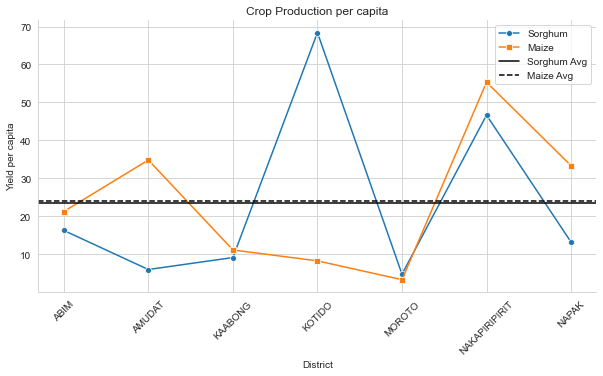

In [80]:
# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the lines using seaborn
sns.lineplot(x='NAME', y='S_per_capita_yield', data=df, label='Sorghum', ax=ax, marker='o') 
sns.lineplot(x='NAME', y='M_per_capita_yield', data=df, label='Maize', ax=ax, marker='s') 
plt.axhline(y=23.48, color='black', linestyle='-', label='Sorghum Avg')
plt.axhline(y=23.92, color='black', linestyle='--', label='Maize Avg')

# Set title and labels
ax.set_title('Crop Production per capita')
ax.set_xlabel('District')
ax.set_ylabel('Yield per capita')


plt.xticks(rotation=45)


sns.set_style("whitegrid")
sns.despine()  

# Show the plot
plt.legend()
plt.show()

From the above chart it is evident the Kotido District and Moroto District have a higher yield per capita for Sorghum compared to maize.

For the yield per capita, Kaabong District and Moroto District are below average  yield per capita  for both Staple crops.


In [82]:
df.columns

Index(['OBJECTID', 'NAME', 'POP', 'Area', 'S_Yield_Ha', 'M_Yield_Ha',
       'Crop_Area_Ha', 'S_Area_Ha', 'M_Area_Ha', 'S_Prod_Tot', 'M_Prod_Tot',
       'S_per_capita_yield', 'M_per_capita_yield', 'Population_Density'],
      dtype='object')

## Population Density per District

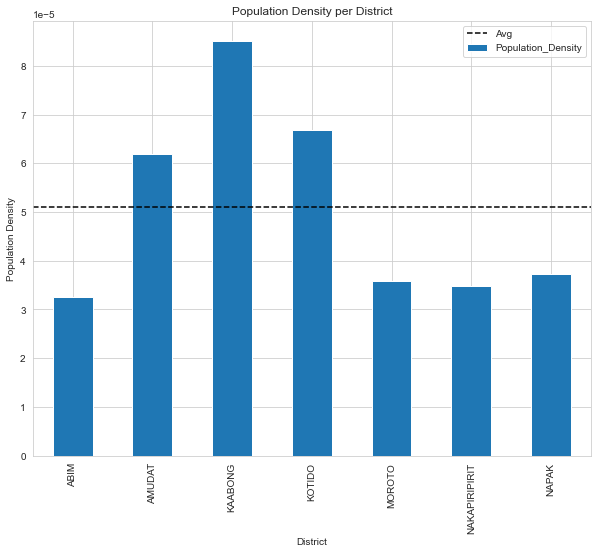

In [91]:
#Population plot 
df.plot.bar(x ='NAME', y ='Population_Density', figsize = (10,8))
plt.xlabel('District')
plt.ylabel('Population Density')
plt.title('Population Density per District');
plt.axhline(y=0.000051, color='black', linestyle='--', label='Avg')

plt.legend()
plt.show()


From the chart, Kaabong has the highest population density.

# Conculsion

From the Sub-County data, Lolelia and Kalapata both in Kaabong are the most populous sub-counties.

For the yield per capita, Kaabong District and Moroto District are below average  yield per capita  for both Staple crops.

Napak District, Moroto District, Kaabong District, and Amudat District all have a Sorghum yield below average.
Kaabong District, Moroto District and Napak District have a below average yield for maize.

With 7 out of 8 subcounties, Napak District is the most vulnerable , followed by Moroto with 5 out of 7. 
This means that 87% of Napak District lies below average yield for both staple crops closely followed by Moroto
at 83%.

Kabong District is vulnerable to food insecurity shocks due to it's high population.

Examining the yield per capita for both crops in all the sub-counties, most sub conties fall below average for Sorghum yield per capita however more than a third of the subcounties are above the average maize yield per capita. 

All subcounties harvest more maize than sorghum except for Southern Division in Moroto District which does not grow any maize.

## Reccommendations

Kaabong District, Napak District and  Moroto Districst should be considered for technical support as well as farm inputs.
